In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import KFold, cross_validate, cross_val_score, cross_val_predict, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, learning_curve
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, PrecisionRecallDisplay

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb


from sklearn.feature_selection import SelectKBest, chi2 
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from collections import Counter



from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df.head()

,tweet,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,...,Hash_words_ad,clean_tweet,clean_anonymized_description,tweet_len,word_count,tokenized_text,pos_tags,lemmatized_text,stemmed_text,swear_word_bin
0,@unknown Con tutte le denunce che si sta becca...,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,...,No hashtags,Con tutte le denunce che si sta beccando Salvi...,Avete presente quegli stereotipi sui siciliani...,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...","[('denunce', 'NOUN'), ('beccando', 'VERB'), ('...","['denuncia', 'beccare', 'Salvini', 'rischiare'...","['denunc', 'becc', 'salvin', 'risc', 'aument',...",0
1,#PRESCRIZIONE : I (t)re magi hanno trovato l’a...,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,...,No hashtags,PRESCRIZIONE I tre magi hanno trovato laccord...,Prof di latino e Deputata PDAma lo sport la Ro...,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...","[('PRESCRIZIONE', 'VERB'), ('tre', 'NUM'), ('m...","['PRESCRIZIONE', 'tre', 'mago', 'trovare', 'la...","['prescrizion', 'tre', 'mag', 'trov', 'laccord...",0
2,Il #m5s ha votato contro le #unionicivili addu...,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,...,No hashtags,Il m5s ha votato contro le unionicivili adduce...,Medico appassionato di Cinema dAutore Musica e...,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...","[('m5s', 'NOUN'), ('votato', 'VERB'), ('unioni...","['m5s', 'votare', 'unionicivile', 'adducere', ...","['m5s', 'vot', 'unionicivil', 'adduc', 'scus',...",1
3,La #Lega e il #m5s stanno dando a bere all'opi...,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,...,No hashtags,La Lega e il m5s stanno dando a bere allopinio...,nodescription,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...","[('Lega', 'VERB'), ('m5s', 'PROPN'), ('dando',...","['lega', 'm5s', 'dare', 'bere', 'allopinione',...","['leg', 'm5s', 'dand', 'ber', 'allopinion', 'p...",0
4,Che cosa cambia questa #legge? Caro @667517147...,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,...,No hashtags,Che cosa cambia questa legge Caro con il decr...,Veneto Assessore Regionale Sviluppo Economico ...,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...","[('cambia', 'VERB'), ('legge', 'NOUN'), ('Caro...","['cambiare', 'legge', 'Caro', 'decretoinsicure...","['camb', 'legg', 'car', 'decretoinsicurezz', '...",0


# Model without metadata

In [3]:
X = df['clean_tweet'].values
y = df['is_hate_speech'].values

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

In [5]:

Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,2),   # hyperparameter
                                 max_df=.8,)

X_train_cnt = Cntvectorizer.fit_transform(X_train)
X_test_cnt = Cntvectorizer.transform(X_test)

#Looking at the distribution of labels in the target variable, as well as info on the X_train matrix
print(np.unique(y_train, return_counts=True))

(array([0, 1], dtype=int64), array([4655, 2290], dtype=int64))


In [6]:
# TFvectorizer 

TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,2),
                               max_df=.8,                               )

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)


In [7]:
# SVC with CountVect clean_tweet

clf = SVC()

clf.fit(X_train_cnt, y_train)

y_pred = clf.predict(X_test_cnt)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_weighted:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7883775613033255
F1-score_weighted: 0.7037693042509154
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.86      1996
           1       0.93      0.39      0.55       981

    accuracy                           0.79      2977
   macro avg       0.85      0.69      0.70      2977
weighted avg       0.82      0.79      0.76      2977



In [8]:
#SVC with TFidf clean_tweet

clf = SVC()

clf.fit(X_train_tfid, y_train)

y_pred = clf.predict(X_test_tfid)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average= 'macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_weighted:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.7749412159892509
F1-score_weighted: 0.6746246403006793
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.99      0.86      1996
           1       0.95      0.33      0.49       981

    accuracy                           0.77      2977
   macro avg       0.85      0.66      0.67      2977
weighted avg       0.82      0.77      0.74      2977



### Pipeline TfidfVectorizer

In [9]:


# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_tfidf = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    # Define a pipeline with TfidfVectorizer and SVC
    tfidf_vectorizer = TfidfVectorizer()
    svc_classifier = SVC()

    tfidf_pipe = Pipeline([
        ('vect', tfidf_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', svc_classifier),
        
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_tfidf = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85, 0.9],
        'vect__min_df':[2,5,7,10],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__gamma': ['auto', 'scale'],
        'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'clf__class_weight': [None, 'balanced'],
    }

    # Create RandomizedSearchCV
    random_search_tfidf = RandomizedSearchCV(
        tfidf_pipe, param_distributions=param_dist_tfidf, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_tfidf.fit(X_train, y_train)

    # Store final best results
    final_results_dict_tfidf[text_representation] = {
        'best_parameters': random_search_tfidf.best_params_,
        'best_f1_score': random_search_tfidf.best_score_,
    }

    # Print best parameters and accuracy
    print(f"Best Parameters for TfidfVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_tfidf.best_params_)
    print("Best f1-score:", random_search_tfidf.best_score_)

    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_tfidf.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits=3)

    print(f'Accuracy (TfidfVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (TfidfVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (TfidfVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")


# Convert the dictionary to JSON format
final_results_json_tfidf = json.dumps(final_results_dict_tfidf, indent=2)

# Save the JSON to a file
with open('final_results_tfidf_SVC.json', 'w') as file:
    file.write(final_results_json_tfidf)


Best Parameters for TfidfVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.9, 'sel__k': 100, 'clf__kernel': 'linear', 'clf__gamma': 'auto', 'clf__class_weight': 'balanced', 'clf__C': 10}
Best f1-score: 0.7872769125286821
                                                                                                                                 
Accuracy (TfidfVectorizer - tokenized_text): 0.8337252267383272
F1-score_macro (TfidfVectorizer - tokenized_text): 0.7910006973663889
Classification Report (TfidfVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.823     0.959     0.885      1996
           1      0.874     0.579     0.697       981

    accuracy                          0.834      2977
   macro avg      0.848     0.769     0.791      2977
weighted avg      0.839     0.834     0.823      2977

                                                               

### Pipeline CountVectorizer

In [10]:


# List of text representations
text_representations = ['tokenized_text', 'lemmatized_text']

# Dictionary to store final best results
final_results_dict_count = {}

for text_representation in text_representations:
    X = df[text_representation].values
    y = df['is_hate_speech'].values

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

    # Define a pipeline with CountVectorizer 
    count_vectorizer = CountVectorizer()
    svc_classifier = SVC()

    svc_pipe = Pipeline([
        ('vect', count_vectorizer),
        ('sel', SelectKBest(chi2)),
        ('clf', svc_classifier),
    ])

    # Define parameter distributions for RandomizedSearchCV
    param_dist_svc = {
        'sel__k':[50,100,200,500,1000,'all'],
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3)],
        'vect__max_df': [0.75, 0.8, 0.85, 0.9], 
        'vect__min_df':[2,5,7,10],
        'clf__C': [0.01, 0.1, 1, 10],
        'clf__gamma': ['auto', 'scale'],
        'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'clf__class_weight': [None, 'balanced'],
    }

    # Create RandomizedSearchCV
    random_search_count = RandomizedSearchCV(
        svc_pipe, param_distributions= param_dist_svc, scoring='f1_macro',
        n_iter=75, cv=5, n_jobs=15, random_state=42
    )

    # Perform RandomizedSearchCV
    random_search_count.fit(X_train, y_train)

    # Store final best results
    final_results_dict_count[text_representation] = {
        'best_parameters': random_search_count.best_params_,
        'best_f1_score': random_search_count.best_score_,
    }

        # Print best parameters and accuracy
    print(f"Best Parameters for CountVectorizer ({text_representation} - RandomizedSearchCV):")
    print(random_search_count.best_params_)
    print("Best f1-score:", random_search_count.best_score_)

    print("                                                                                                                                 ")
    print("                                                                                                                                 ")

    # Evaluate the best model on the test set
    y_pred_tfidf = random_search_count.best_estimator_.predict(X_test)

    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    f1_scores_tfidf = f1_score(y_test, y_pred_tfidf, average='macro')
    classification_rep_tfidf = classification_report(y_test, y_pred_tfidf, digits = 3)

    print(f'Accuracy (CountVectorizer - {text_representation}):', accuracy_tfidf)
    print(f'F1-score_macro (CountVectorizer - {text_representation}):', f1_scores_tfidf)
    print(f'Classification Report (CountVectorizer - {text_representation}):')
    print(classification_rep_tfidf)

# Convert the dictionary to JSON format
final_results_json_count = json.dumps(final_results_dict_count, indent=2)

# Save the JSON to a file
with open('final_results_count_SVC.json', 'w') as file:
    file.write(final_results_json_count)


Best Parameters for CountVectorizer (tokenized_text - RandomizedSearchCV):
{'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.9, 'sel__k': 100, 'clf__kernel': 'linear', 'clf__gamma': 'auto', 'clf__class_weight': 'balanced', 'clf__C': 10}
Best f1-score: 0.7824940497787736
                                                                                                                                 
                                                                                                                                 
Accuracy (CountVectorizer - tokenized_text): 0.8310379576755123
F1-score_macro (CountVectorizer - tokenized_text): 0.7876229308591789
Classification Report (CountVectorizer - tokenized_text):
              precision    recall  f1-score   support

           0      0.821     0.957     0.884      1996
           1      0.868     0.575     0.692       981

    accuracy                          0.831      2977
   macro avg      0.844     0.766     0.78

### Balancing the dataset with the best model - TfidfVectorizer

{'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.9, 'sel__k': 100, 'clf__kernel': 'linear', 'clf__gamma': 'auto',\
'clf__class_weight': 'balanced', 'clf__C': 10}


In [11]:

X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)


# TfidfVectorizer
TFvectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=5
)

X_train_tfid = TFvectorizer.fit_transform(X_train)
X_test_tfid = TFvectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=100)
X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# SVC with Tomek Links
clf_tomek = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state = 42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_tfid_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_tfid_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote, digits = 3)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_tfid_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))

# SVM with ADASYN
clf_adasyn = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_tfid_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn, digits = 3)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4453, 1: 2290})
Tomek Links:
Accuracy: 0.8343970440040309
F1-score_macro: 0.7918451389931913
Classification Report:
              precision    recall  f1-score   support

           0      0.823     0.959     0.886      1996
           1      0.875     0.580     0.698       981

    accuracy                          0.834      2977
   macro avg      0.849     0.770     0.792      2977
weighted avg      0.840     0.834     0.824      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.8327175008397716
F1-score_macro: 0.7898142540218309
Classification Report:
              precision    recall  f1-score   support

           0      0.822     0.958     0.885      1996
           1      0.871     0.578     0.695       981

    accuracy                          0.833      2977
   macro avg      0.846     0.768     0.790      2977
weighted avg      0.838     0.833     0.822      2977

ADASYN Resampled dataset shape Count

### Balancing - CountVectorizer
Best Parameters for CountVectorizer (to_wordcloud - RandomizedSearchCV):
{'vect__ngram_range': (1, 2), 'vect__max_df': 0.8, 'clf__kernel': 'sigmoid', 'clf__gamma': 'scale', 'clf__class_weight': 'balanced', 'clf__C': 1}

In [12]:


X = df['tokenized_text'].values
y = df['is_hate_speech'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

# CountVectorizer
vectorizer = CountVectorizer(
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=5
)

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest(score_func=chi2, k=100)
X_train_count_selected = k_best.fit_transform(X_train_count, y_train)
X_test_count_selected = k_best.transform(X_test_count)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_count_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

clf_tomek = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_count_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

# SMOTE
smote = SMOTE(random_state =42)
X_res_smote, y_res_smote = smote.fit_resample(X_train_count_selected, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_res_smote))

clf_smote = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_smote.fit(X_res_smote, y_res_smote)

y_pred_smote = clf_smote.predict(X_test_count_selected)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
f1_scores_smote = f1_score(y_test, y_pred_smote, average='macro')
classification_rep_smote = classification_report(y_test, y_pred_smote)

print('SMOTE:')
print('Accuracy:', accuracy_smote)
print('F1-score_macro:', f1_scores_smote)
print('Classification Report:')
print(classification_rep_smote)

# ADASYN
adasyn = ADASYN(random_state = 42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train_count_selected, y_train)
print('ADASYN Resampled dataset shape %s' % Counter(y_res_adasyn))


clf_adasyn = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto'
)

clf_adasyn.fit(X_res_adasyn, y_res_adasyn)

y_pred_adasyn = clf_adasyn.predict(X_test_count_selected)

accuracy_adasyn = accuracy_score(y_test, y_pred_adasyn)
f1_scores_adasyn = f1_score(y_test, y_pred_adasyn, average='macro')
classification_rep_adasyn = classification_report(y_test, y_pred_adasyn)

print('ADASYN:')
print('Accuracy:', accuracy_adasyn)
print('F1-score_macro:', f1_scores_adasyn)
print('Classification Report:')
print(classification_rep_adasyn)


Tomek Resampled dataset shape Counter({0: 4655, 1: 2290})
Tomek Links:
Accuracy: 0.8310379576755123
F1-score_macro: 0.7876229308591789
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      1996
           1       0.87      0.57      0.69       981

    accuracy                           0.83      2977
   macro avg       0.84      0.77      0.79      2977
weighted avg       0.84      0.83      0.82      2977

SMOTE Resampled dataset shape Counter({0: 4655, 1: 4655})
SMOTE:
Accuracy: 0.834061135371179
F1-score_macro: 0.7902147839265254
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      1996
           1       0.88      0.57      0.69       981

    accuracy                           0.83      2977
   macro avg       0.85      0.77      0.79      2977
weighted avg       0.84      0.83      0.82      2977

ADASYN Resampled dataset shape Counte

# Best Model confusion matrix and PR curve
-TfidfVectorizer  + TomekLinks

- {'vect__ngram_range': (1, 2), 'vect__min_df': 5, 'vect__max_df': 0.9, 'sel__k': 100, 'clf__kernel': 'linear', 'clf__gamma': 'auto', 'clf__class_weight': 'balanced', 'clf__C': 10}


Tomek Resampled dataset shape Counter({0: 4453, 1: 2290})
Tomek Links:
Accuracy: 0.8343970440040309
F1-score_macro: 0.7918451389931913
Classification Report:
              precision    recall  f1-score   support

           0      0.823     0.959     0.886      1996
           1      0.875     0.580     0.698       981

    accuracy                          0.834      2977
   macro avg      0.849     0.770     0.792      2977
weighted avg      0.840     0.834     0.824      2977



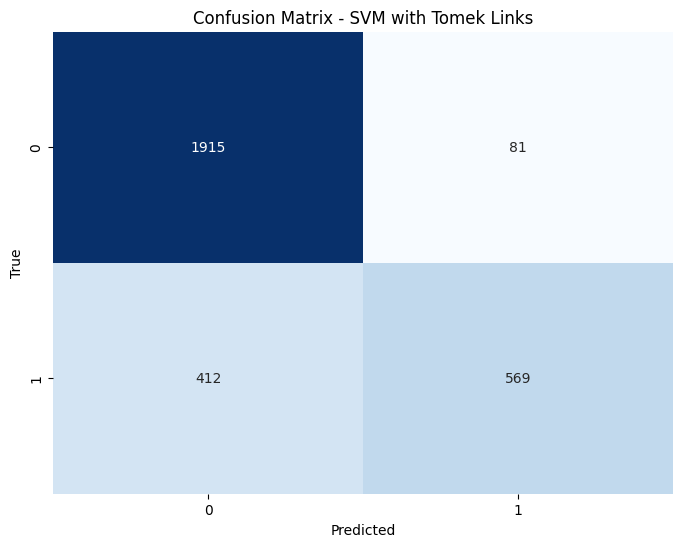

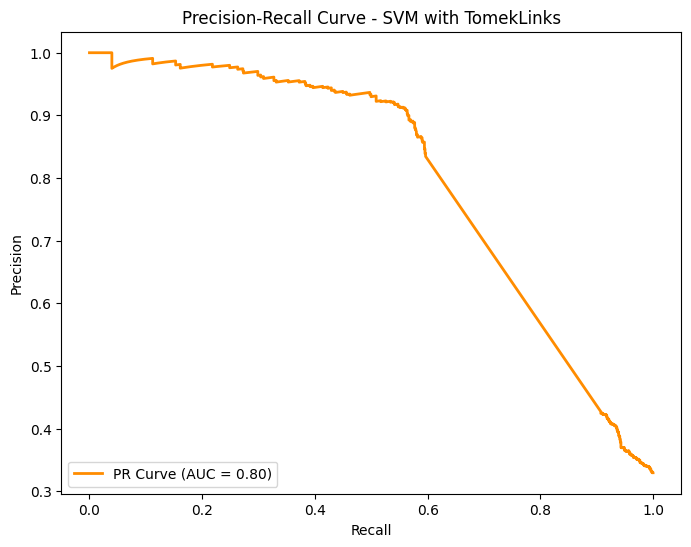

Precision-Recall Metrics:
AUC Score: 0.8021422676936664


In [13]:
X = df['tokenized_text'].values
y = df['is_hate_speech'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)



# TfidfVectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    max_df=0.9,
    min_df=5
)


X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

# Feature selection with SelectKBest
k_best = SelectKBest((chi2), k=100)

X_train_tfid_selected = k_best.fit_transform(X_train_tfid, y_train)
X_test_tfid_selected = k_best.transform(X_test_tfid)

# Tomek Links
tom = TomekLinks()
X_res_tomek, y_res_tomek = tom.fit_resample(X_train_tfid_selected, y_train)
print('Tomek Resampled dataset shape %s' % Counter(y_res_tomek))

# SVC with Tomek Links
clf_tomek = SVC(
    kernel='linear',
    C=10,
    class_weight='balanced',
    gamma='auto',
    probability = True
)

clf_tomek.fit(X_res_tomek, y_res_tomek)

y_pred_tomek = clf_tomek.predict(X_test_tfid_selected)

accuracy_tomek = accuracy_score(y_test, y_pred_tomek)
f1_scores_tomek = f1_score(y_test, y_pred_tomek, average='macro')
classification_rep_tomek = classification_report(y_test, y_pred_tomek, digits = 3)

print('Tomek Links:')
print('Accuracy:', accuracy_tomek)
print('F1-score_macro:', f1_scores_tomek)
print('Classification Report:')
print(classification_rep_tomek)

cm = confusion_matrix(y_test, y_pred_tomek)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM with Tomek Links')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, clf_tomek.predict_proba(X_test_tfid_selected)[:, 1])

# Calculate area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='PR Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM with TomekLinks')
plt.legend(loc='lower left')
plt.show()

# Display precision-recall metrics
print("Precision-Recall Metrics:")
print("AUC Score:", auc_score)


# Model WITH metadata


In [14]:
df = pd.read_csv("df_preprocessed.csv", skipinitialspace= True)
df = df.drop(['Hash_words_ad','Hash_words_tweet','anonymized_description','tweet','Weighted_Engagement','clean_anonymized_description', 'clean_tweet', 'lemmatized_text', 'stemmed_text', 'pos_tags'], axis = 1 )
df.head()


,is_hate_speech,dataset,retweet_count,favorite_count,is_reply,is_quote,statuses_count,followers_count,friends_count,device,tweet_len,word_count,tokenized_text,swear_word_bin
0,1,0,0.0,6.0,1.0,0.0,554.0,748.0,753.0,5,120,20,"['denunce', 'beccando', 'Salvini', 'rischia', ...",0
1,0,0,154.0,448.0,0.0,0.0,35043.0,10838.0,4535.0,5,255,46,"['PRESCRIZIONE', 'tre', 'magi', 'trovato', 'la...",0
2,1,0,195.0,638.0,0.0,0.0,139750.0,7971.0,1866.0,5,255,40,"['m5s', 'votato', 'unionicivili', 'adducendo',...",1
3,0,0,112.0,377.0,0.0,0.0,3356.0,8493.0,5303.0,3,246,38,"['Lega', 'm5s', 'dando', 'bere', 'allopinione'...",0
4,0,0,45.0,143.0,0.0,0.0,11234.0,10815.0,1810.0,4,195,31,"['cambia', 'legge', 'Caro', 'decretoinsicurezz...",0


In [15]:
X_tweet = df['tokenized_text'].values
y = df['is_hate_speech'].values


In [16]:
Cntvectorizer = CountVectorizer( # 
                                 ngram_range=(1,3),   # hyperparameter
                                 max_df=.75,
                                 min_df = 5)

X_tweet_cnt = Cntvectorizer.fit_transform(X_tweet)


In [17]:
# Try Tfid vectorizer same approach 


TFvectorizer = TfidfVectorizer(
                              ngram_range=(1,2),
                               max_df=.9,
                               min_df = 5
                               )

X_tweet_tfid = TFvectorizer.fit_transform(X_tweet)

In [18]:
df_meta = pd.read_csv("dataset_final.csv", skipinitialspace= True)
df_meta = df.drop(['is_hate_speech', 'tokenized_text', 'tweet_len'], axis = 1 )


df_meta = df_meta.values

In [19]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_cnt = hstack([X_tweet_cnt, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_cnt.shape)




(9922, 5415)


In [20]:
# MERGE vectorized Tweet and metadata
# Keep SPARSE MATRIX

from scipy.sparse import hstack

merged_sparse_tfid = hstack([X_tweet_tfid, df_meta])


# Print the shape of the merged sparse matrix
print(merged_sparse_tfid.shape)

(9922, 5365)


In [21]:
X_train_meta_cnt, X_test_meta_cnt, y_train, y_test = train_test_split(merged_sparse_cnt, y, stratify = y, test_size=0.3, random_state=0)
X_train_meta_tfid, X_test_meta_tfid, y_train, y_test = train_test_split(merged_sparse_tfid, y, stratify = y, test_size=0.3, random_state=0)

#Split to train and test for both vectorizers

In [22]:
clf = SVC()

clf.fit(X_train_meta_tfid, y_train)

y_pred = clf.predict(X_test_meta_tfid)


accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.6728249916022842
F1-score_macro: 0.4118748783020705
Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80      1996
           1       0.77      0.01      0.02       981

    accuracy                           0.67      2977
   macro avg       0.72      0.50      0.41      2977
weighted avg       0.70      0.67      0.55      2977

